## Compare the performance of the scikit and the custom decision tree classifiers

Tested on the Wine Quality dataset from UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/wine+quality

## Import of the dataset

In [1]:
import pandas as pd

data = pd.read_csv('datasets/winequality-red.csv')
print("Dataset Classes:")
print(data.iloc[:,-1].unique())
data

Dataset Classes:
[5 6 7 4 8 3]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Split the dataset into training and testing sets

In [2]:
from sklearn.model_selection import train_test_split

x = data.drop(columns="quality")
y = data["quality"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Comparison of the performance of the tree classifiers
### 1) Compare on predefined parameters

In [3]:
from sklearn.tree import DecisionTreeClassifier
from algorithms.tree import CustomDecisionTreeClassifier

print("Tree Classifier Comparison for overfit parameters")
print("------------------------------------------------------")

# Default tree (no specified parameters)
scikit_model = DecisionTreeClassifier(max_depth=100, min_samples_split=2, min_samples_leaf=1, random_state=42)
scikit_model.fit(x_train, y_train)
scikit_score = scikit_model.score(x_test, y_test)
print("Scikit-learn model accuracy on test data:        ", "{:.2f}".format(scikit_score))
scikit_train_score = scikit_model.score(x_train, y_train)
print("Scikit-learn model accuracy on training data:    ", "{:.2f}".format(scikit_train_score))

# Custom tree (no specified parameters)
custom_model = CustomDecisionTreeClassifier(max_depth=100, min_samples_split=2, min_samples_leaf=1)
custom_model.fit(x_train, y_train)
custom_score = custom_model.score(x_test, y_test)
print("Custom model accuracy on test data:              ", "{:.2f}".format(custom_score))
custom_train_score = custom_model.score(x_train, y_train)
print("Custom model accuracy on training data:          ", "{:.2f}".format(custom_train_score))


Tree Classifier Comparison for overfit parameters
------------------------------------------------------
Scikit-learn model accuracy on test data:         0.56
Scikit-learn model accuracy on training data:     1.00
Custom model accuracy on test data:               0.57
Custom model accuracy on training data:           1.00


In [11]:
print("Tree Classifier Comparison for random parameters")
print("------------------------------------------------------")
print("max_depth=2, min_samples_split=3, min_samples_leaf=4")
print("------------------------------------------------------")

# Default tree (random parameters)
scikit_model = DecisionTreeClassifier(max_depth=2, min_samples_split=3, min_samples_leaf=4, random_state=42)
scikit_model.fit(x_train, y_train)
scikit_score = scikit_model.score(x_test, y_test)
print("Scikit-learn model accuracy on test data:        ", "{:.2f}".format(scikit_score))
scikit_train_score = scikit_model.score(x_train, y_train)
print("Scikit-learn model accuracy on training data:    ", "{:.2f}".format(scikit_train_score))

# Custom tree (random parameters)
custom_model = CustomDecisionTreeClassifier(max_depth=2, min_samples_split=3, min_samples_leaf=4)
custom_model.fit(x_train, y_train)
custom_score = custom_model.score(x_test, y_test)
print("Custom model accuracy on test data:              ", "{:.2f}".format(custom_score))
custom_train_score = custom_model.score(x_train, y_train)
print("Custom model accuracy on training data:          ", "{:.2f}".format(custom_train_score))


Tree Classifier Comparison for random parameters
------------------------------------------------------
max_depth=3, min_samples_split=3, min_samples_leaf=5
------------------------------------------------------
Scikit-learn model accuracy on test data:         0.53
Scikit-learn model accuracy on training data:     0.56
Custom model accuracy on test data:               0.53
Custom model accuracy on training data:           0.56


### 2) Compare on the best parameters obtained by hyperparameter tuning

#### Hyperparameter space

In [5]:
params = dict()
# max depth list from 1 to 20
params['max_depth'] = list(range(1, 31))
params['min_samples_split'] = list(range(2, 7))
params['min_samples_leaf'] = list(range(1, 6))
print(params)

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'min_samples_split': [2, 3, 4, 5, 6], 'min_samples_leaf': [1, 2, 3, 4, 5]}


#### K-Fold Cross Validation

In [6]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

#### Initialize Optimizer

In [7]:
from sklearn.model_selection import GridSearchCV
from algorithms.fast_parameter_search import MyGridSearchCV

scikit_clf = DecisionTreeClassifier()
scikit_params = params.copy()
scikit_params['random_state'] = [42]
scikit_search = GridSearchCV(estimator=scikit_clf, param_grid=scikit_params, cv=cv, scoring ='accuracy', verbose=0, n_jobs=-1)

custom_clf = CustomDecisionTreeClassifier()

custom_search = MyGridSearchCV(custom_clf, params, cv=cv, n_jobs=-1)

#### Results

In [8]:
#Scikit Learn Decision Tree
scikit_search.fit(x_train, y_train)
print("Scikit Learn Decision Tree")
print("Best score", scikit_search.best_score_)
print("Best parameters", scikit_search.best_params_)

# Custom Decision Tree
custom_search.fit(x_train, y_train)
print("Custom Decision Tree")
print("Best score", custom_search.best_score)
print("Best parameters", custom_search.best_params)

Scikit Learn Decision Tree
Best score 0.6067248774509804
Best parameters {'max_depth': 21, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}
Custom Decision Tree
Best score 0.6030810866013071
Best parameters {'max_depth': 22, 'min_samples_split': 2, 'min_samples_leaf': 1}


In [9]:
from sklearn.metrics import accuracy_score

best_scikit_model = scikit_search.best_estimator_
best_scikit_model.fit(x_train, y_train)
y_pred_scikit = best_scikit_model.predict(x_test)
scikit_accuracy = accuracy_score(y_test, y_pred_scikit)

best_custom_model = custom_search.best_estimator
best_custom_model.fit(x_train, y_train)
y_pred_custom = best_custom_model.predict(x_test)
custom_accuracy = accuracy_score(y_test, y_pred_custom)

print("Tree Classifier Comparison for best parameters")
print("------------------------------------------------------")
print("Scikit-learn model accuracy on test data:        ", "{:.2f}".format(scikit_accuracy))
print("Custom model accuracy on test data:              ", "{:.2f}".format(custom_accuracy))



Tree Classifier Comparison for best parameters
------------------------------------------------------
Scikit-learn model accuracy on test data:         0.56
Custom model accuracy on test data:               0.57


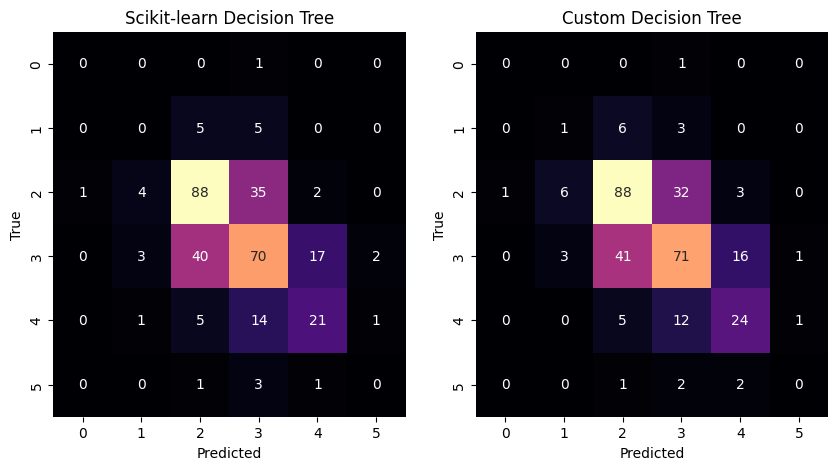

In [15]:
# Plot confusion matrices of the two models next to each other

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

scikit_cm = confusion_matrix(y_test, y_pred_scikit)
sns.heatmap(scikit_cm, annot=True, fmt='d', ax=axs[0], cmap="magma", cbar=False)
axs[0].set_title('Scikit-learn Decision Tree')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('True')

custom_cm = confusion_matrix(y_test, y_pred_custom)
sns.heatmap(custom_cm, annot=True, fmt='d', ax=axs[1], cmap="magma", cbar=False)
axs[1].set_title('Custom Decision Tree')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('True')

plt.show()